## 1.什么是随机森林

Random Forest(随机森林)是一种基于树模型的Bagging的优化版本，一棵树的生成肯定还是不如多棵树，因此就有了随机森林，解决决策树泛化能力弱的特点。(可以理解成三个臭皮匠顶过诸葛亮)

而同一批数据，用同样的算法只能产生一棵树，这时Bagging策略可以帮助我们产生不同的数据集。

**Bagging**策略来源于bootstrap aggregation：从样本集（假设样本集N个数据点）中**随机**重采样选出N个样本（有放回的采样，样本数据点个数仍然不变为N），在所有样本上，对这n个样本建立分类器（ID3\C4.5\CART\SVM\LOGISTIC），重复以上两步m次，获得m个分类器，最后根据这m个分类器的投票结果，决定数据属于哪一类。

如下图所示：
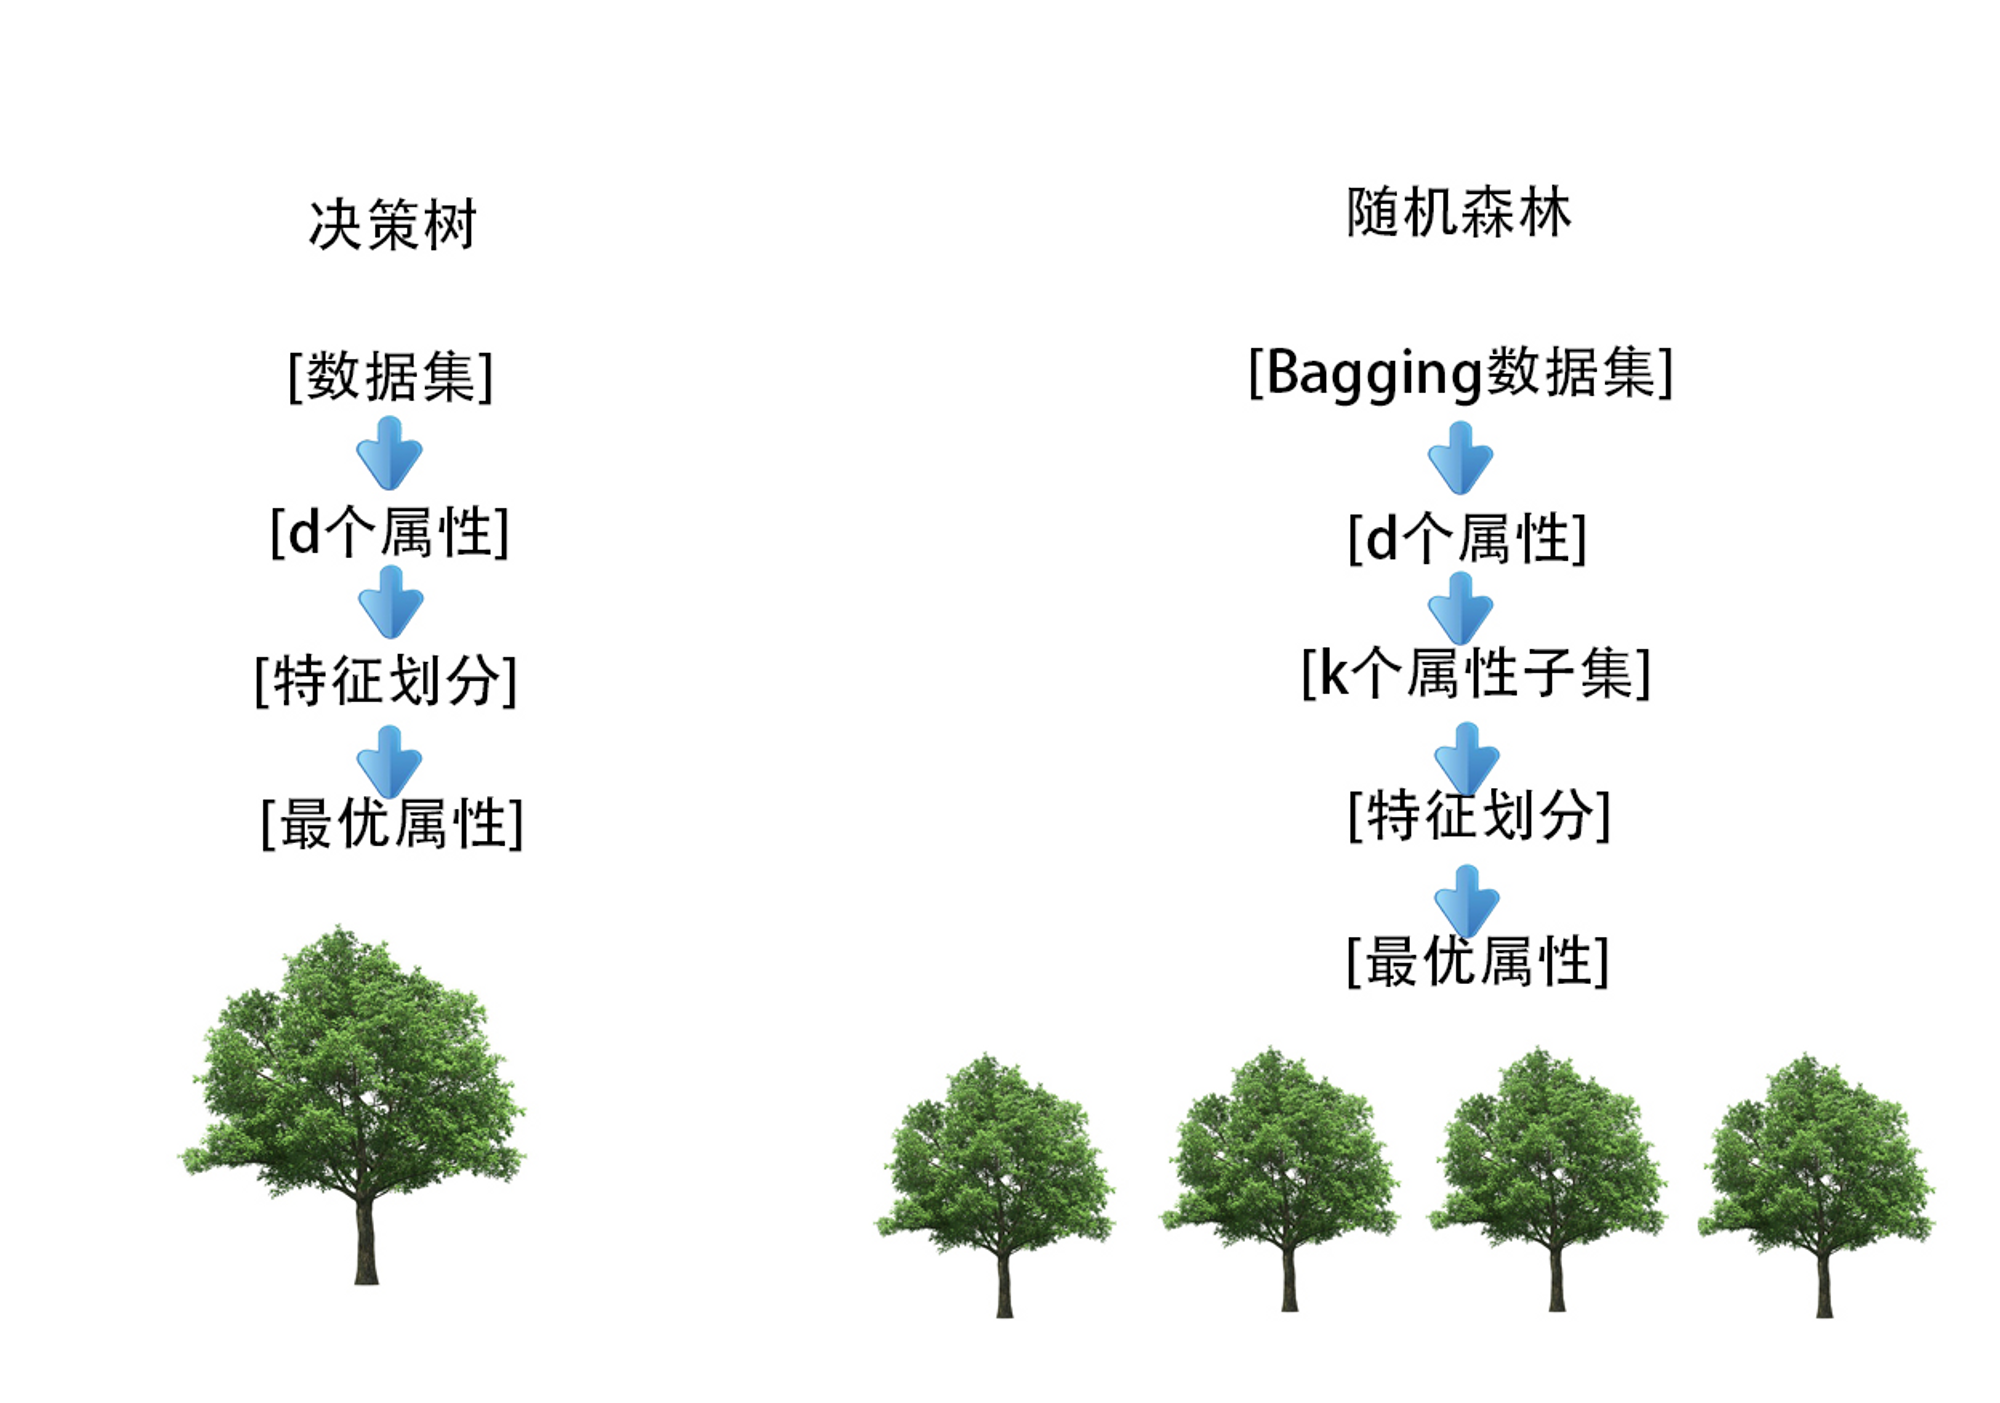


**随机森林产生的原因：**

单个决策树对**训练数据**往往具有较好的分类效果，但是对于未知新样本分类效果较差。为了提升模型对未知样本的分类效果，所以将多个简单的决策树组合起来，形成泛化能力更强的模型——随机森林。

## 2、什么是Bootstrapping&Bagging
### 2.1、Bootstrapping

Bootstrapping算法，指的就是利用有限的样本资料经由多次**有放回的重复抽样**。如：在原样本中有放回的抽样，抽取n次。每抽一次形成一个新的样本，重复操作，形成很多新样本。

1、有放回采样

2、强调偏差

3、串行执行，速度较慢

4、可以提升泛化性能

### 2.2 Bagging思想

Bagging是bootstrap aggregating。思想就是从总体样本当中**随机取一部分样本进行训练（均匀采样）**，通过多次这样的结果，进行投票获取平均值作为结果输出，这就极大可能的避免了不好的样本数据，从而提高准确度。因为有些是不好的样本，相当于噪声，模型学入噪声后会使准确度不高。

1、均匀采样

2、强调方差

3、并行生成，速度快

4、可以提升泛化性能

**bagging举个例子：**

假设有1000个样本，如果按照以前的思维，是直接把这1000个样本拿来训练，但现在不一样，先抽取800个样本来进行训练，假如噪声点是这800个样本以外的样本点，就很有效的避开了。重复以上操作，提高模型输出的平均值。

## 3、随机森林影响因素
### 3.1 随机森林分类效果的影响因素

- 森林中任意两棵树的相关性：相关性越大，错误率越大；
- 森林中每棵树的分类能力：每棵树的分类能力越强，整个森林的错误率越低。

减小特征选择个数m，树的相关性和分类能力也会相应的降低；增大m，两者也会随之增大。所以关键问题是如何选择最优的m（或者是范围），这也是随机森林唯一的一个参数。


### 3.2 学习器组合可能会带来三大好处：

- 由于学习任务的假设空间往往很大，可能有很多假设再训练集上达到相同性能，结合多学习器会提升泛化性能
- 学习算法往往会陷入局部极小，经过多次结合，可降低陷入糟糕局部极小点的风险
- 某些学习任务的真实假设可能不在当前学习算法所考虑的假设空间中，通过结合多个学习器会使假设空间扩大，可能会学得更好的近似

## 4 随机森林**优缺点**

### 4.1 **优点**：

RF简单，容易实现，计算开销小，性能强大。它的扰动不仅来自于样本扰动，还来自于属性扰动，这使得它的泛化性能进一步上升。

### 4.2 **缺点**：

它在训练和预测时都比较慢，而且如果需要区分的类别很多时，随机森林的表现并不会很好。

## 代码演示-Random Forest
- 数据集 iris
- sklearn

In [1]:
#!/usr/bin/env python
# coding: utf-8

# ### 导入随面森林的相关库文件.
from sklearn.ensemble import RandomForestClassifier          # 导入随机森林的包
# from sklearn.model_selection import train_test_split         # 这个用于后台数据的分割
from sklearn.preprocessing import StandardScaler             # 数据的标准化
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 

#导入iris数据
# * Sepal.Length（花萼长度），单位是cm;
# * Sepal.Width（花萼宽度），单位是cm;
# * Petal.Length（花瓣长度），单位是cm;
# * Petal.Width（花瓣宽度），单位是cm;
# * 种类：Iris Setosa（山鸢尾）、Iris Versicolour（杂色鸢尾），以及Iris Virginica（维吉尼亚鸢尾） 共三种

from sklearn import datasets                     # 导入iris自带数据库文件
iris_data = datasets.load_iris()
iris_feature = iris_data.data[:151:2]
iris_target = iris_data.target[:151:2]


In [6]:
# 数据标准化
scaler = StandardScaler()  # 标准化转换
# Compute the mean and std to be used for later scaling.
scaler.fit(iris_feature)  # 训练标准化对象
print(type(iris_target))
iris_feature = scaler.transform(iris_feature)  # 转换数据集
feature_train, feature_test, target_train, target_test = train_test_split(iris_feature, iris_target,test_size=0.3, random_state=0)


<class 'numpy.ndarray'>


In [10]:
# 数据训练
clf = RandomForestClassifier(n_estimators=30)
clf.fit(feature_train, target_train)
# predict_results = clf.predict(feature_test)

RandomForestClassifier(n_estimators=30)

In [11]:
#预测
target_feature = scaler.transform(feature_test)  # 转换数据集
y_predict=clf.predict(target_feature)

In [12]:
#预测值和测试值打分
score = classification_report(target_test, y_predict)
print(score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

